## Telechargement des modèles

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Wed Mar  5 14:59:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8             13W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install Grounding DINO 🦕

In [ ]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .
!pip install -q roboflow

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 463 (delta 175), reused 135 (delta 135), pack-reused 223 (from 1)
Receiving objects: 100% (463/463), 12.87 MiB | 15.33 MiB/s, done.
Resolving deltas: 100% (241/241), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 837.9 kB/s eta 0:00:00
   ━━━━━

In [ ]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


## Download Grounding DINO Weights 🏋️

In [ ]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [ ]:
import os

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


## Load Grounding DINO Model

In [ ]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/content/GroundingDINO


final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
%cd {HOME}
%mkdir {HOME}/data

/content


## Récupération des images

In [ ]:
pip install streetview

In [ ]:
import streetview
from datetime import datetime

from streetview import search_panoramas
from streetview import get_panorama

lat = 43.306259
lon = 5.365613

panos = search_panoramas(lat, lon)


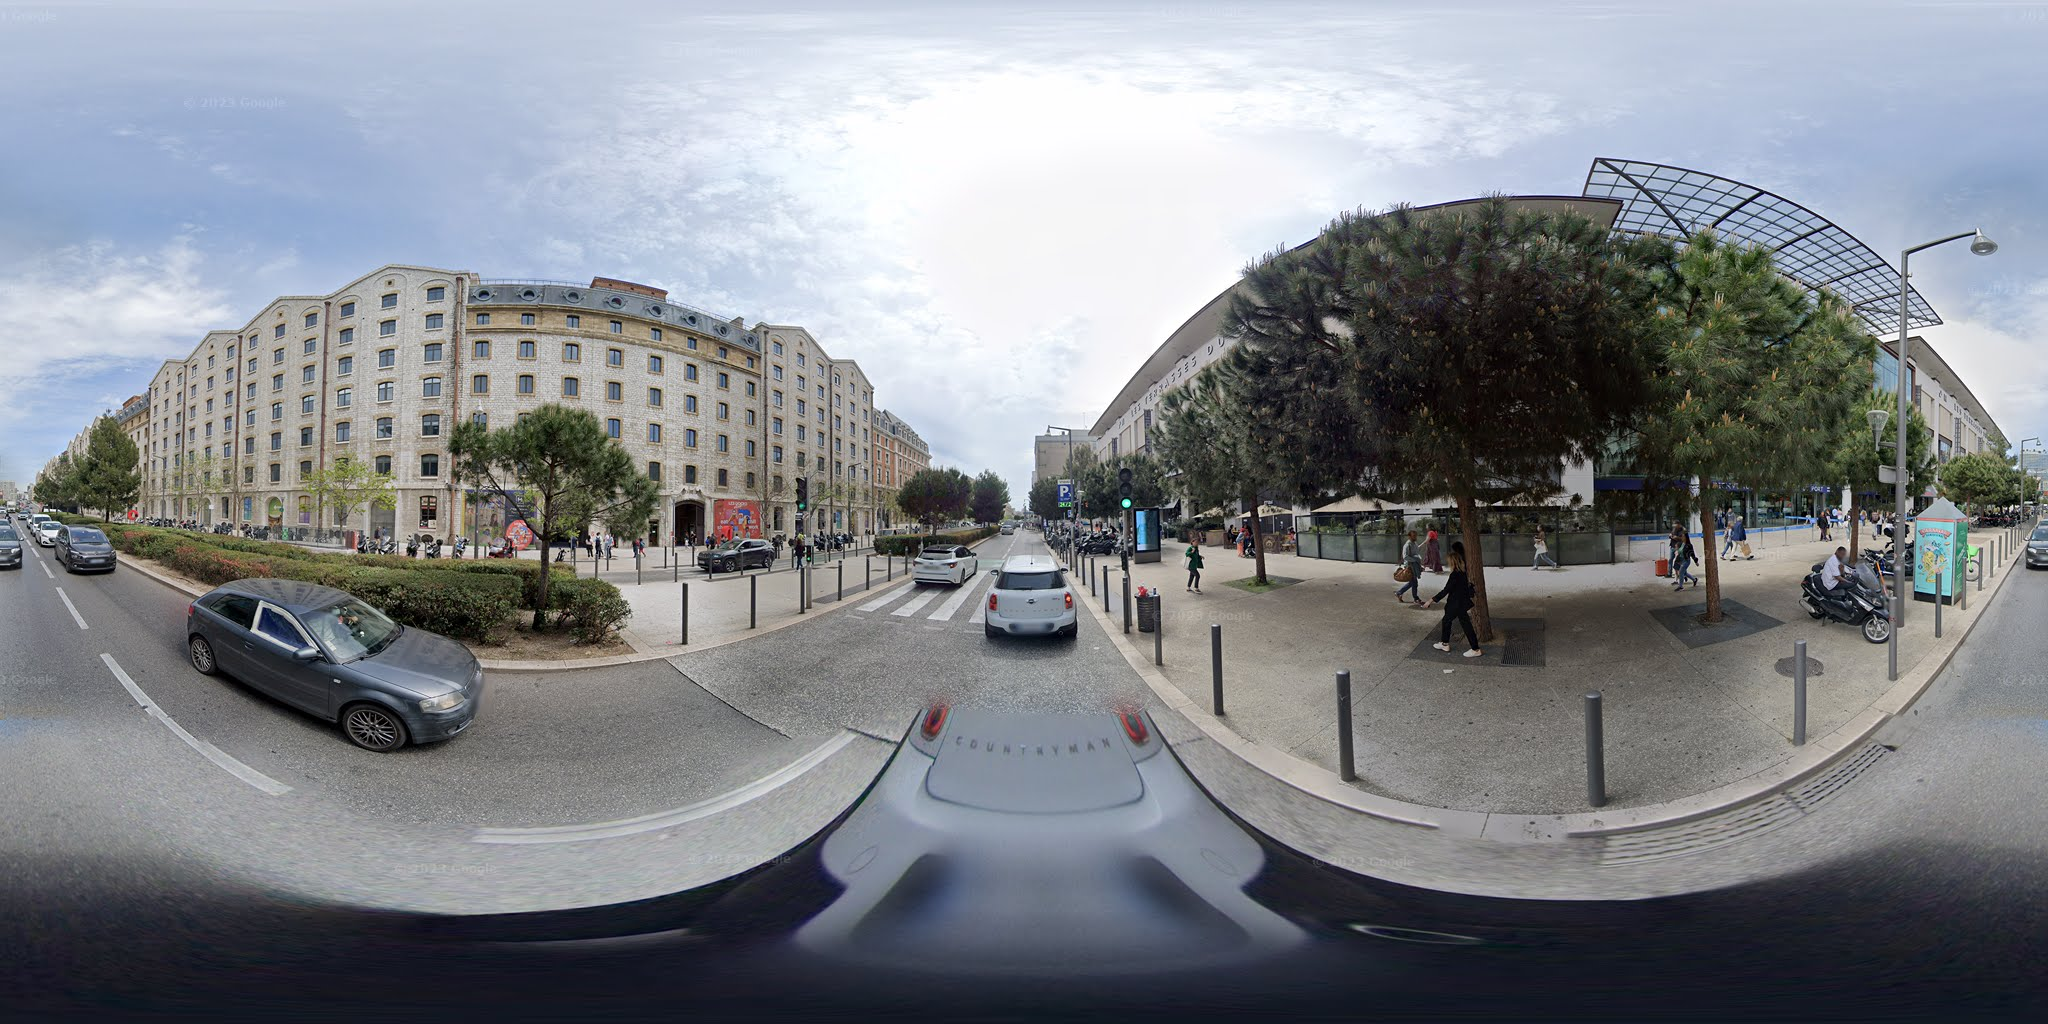

In [ ]:
panos_date = [p for p in panos if p.date]
pano = max(panos_date, key=lambda p: datetime.strptime(p.date, "%Y-%m"))

image = get_panorama(pano.pano_id,zoom = 2)
image

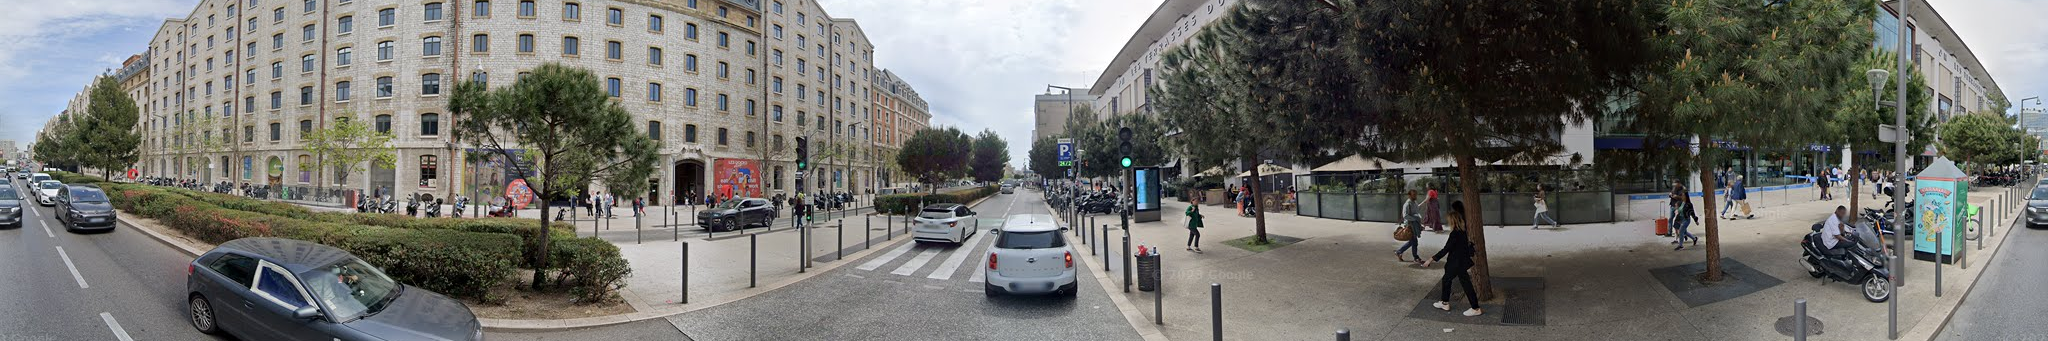

In [ ]:
width, height = image.size
top = height // 3
bottom = 2 * (height // 3)
# Recadrage de l'image : on supprime le tier du haut et du bas
image = image.crop((0, top, width, bottom))

image

In [ ]:
image.save("/content/data/saved_image.jpg")

In [ ]:
labels = [
    "DOOH",
    "Digital Billboards",
    "Outdoor Advertisements",
    "Electronic Billboards",
    "Outdoor Digital Screens",
    "Advertising Screens",
    "Outdoor LED Displays",
    "Digital Advertising Panels",
    "Public Display Screens",
    "Street Billboards",
    "Digital Outdoor Signage",
    "Outdoor LCD Screens",
    "Digital Posters",
    "Electronic Outdoor Ads",
    "LED Advertising Screens",
    "Interactive Billboards",
    "Digital Signage",
    "Outdoor Media Screens"
]

## Test de dino

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def dino (image, prompt):
  TEXT_PROMPT = prompt
  BOX_TRESHOLD = 0.35
  TEXT_TRESHOLD = 0.25
  image.save("/content/data/saved_image.jpg")
  image_source, image_1 = load_image(r'/content/data/saved_image.jpg')

  boxes, logits, phrases = predict(
    model=model,
    image=image_1,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
  )
  #annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
  #sv.plot_image(annotated_frame, (16, 16))
  return boxes

In [ ]:
import supervision as sv


def dino_img (image, prompt,treshold):
  TEXT_PROMPT = prompt
  BOX_TRESHOLD = 0.35
  TEXT_TRESHOLD = 0.25
  image.save("/content/data/saved_image.jpg")
  image_source, image_1 = load_image(r'/content/data/saved_image.jpg')

  boxes, logits, phrases = predict(
    model=model,
    image=image_1,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
  )
  annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
  sv.plot_image(annotated_frame, (16, 16))

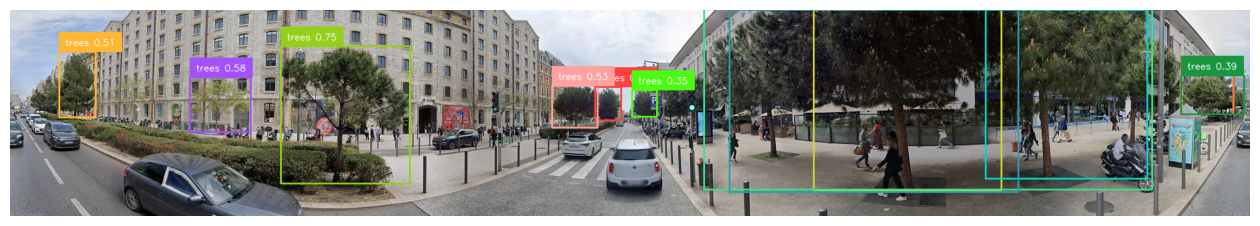

In [ ]:
dino_img (image, "trees",0.35)

In [ ]:
dino (image, "Outdoor Digital Screens",0.35)

tensor([[0.5597, 0.5551, 0.0141, 0.1306],
        [0.5199, 0.4508, 0.0097, 0.0799]])

In [ ]:

# TEXT_PROMPT = "Outdoor Digital Screens"
TEXT_PROMPT = "Outdoor Advertisements"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image_1 = load_image(r'/content/data/saved_image.jpg')

boxes, logits, phrases = predict(
    model=model,
    image=image_1,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

#%matplotlib inline
#sv.plot_image(annotated_frame, (16, 16))

annotated_frame
print(f'boxes : {boxes}')

boxes : tensor([[0.9460, 0.6439, 0.0270, 0.2351],
        [0.3594, 0.5237, 0.0231, 0.1225],
        [0.5199, 0.4502, 0.0093, 0.0780],
        [0.5597, 0.5571, 0.0138, 0.1319]])


In [ ]:
import matplotlib.pyplot as plt

def plot_point_on_image(img, x_rel, y_rel):
    img = np.array(img)
    try:
        height, width, _ = img.shape  # Get image dimensions

        # Calculate absolute coordinates
        x_abs = int(x_rel * width)
        y_abs = int(y_rel * height)

        # Plot the point
        plt.imshow(img)
        plt.scatter(x_abs, y_abs, color='red', s=30)  # Red point, size 50
        plt.axis('off')  # Hide axes
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

## Annotation des images

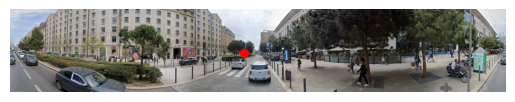

In [ ]:
x_rel, y_rel = solutions[9]
plot_point_on_image(image, x_rel, y_rel)

In [ ]:
### coordonnées panneaux

#Saint charles
p_0 = [(43.3032611,5.3791827),
(43.3033239,5.3791186),
(43.3034091,5.3790315),
(43.3032631,5.3790723)]

#terasses port
p_1 = [(43.3056194,5.3654501),
(43.3054358,5.3654213)]

#place joliette
p_2 = [(43.3050866,5.3664889),
(43.3051049,5.3663656),
(43.3051251,5.3662619),
(43.3050681,5.3666133)]

bib_p = p_0 + p_1 + p_2

###
solutions = [(0.5537, 0.4109),
             (0.6105, 0.3153),
             (0.9275, 0.3560),
             (0.244,0.43),
             (0.8576, 0.5705),
             (0.9533,0.5),
             (0.4307, 0.5671),
             (0,0), #-> publicité non visible
             (0,0), #-> publicité non visible
             (0.472,0.53)
             ]

In [ ]:
import streetview
from datetime import datetime
from streetview import search_panoramas
from streetview import get_panorama

In [ ]:
def pano (coord):
  lat, lon = coord

  panos = search_panoramas(lat, lon)
  panos_date = [p for p in panos if p.date]
  pano = max(panos_date, key=lambda p: datetime.strptime(p.date, "%Y-%m"))

  image = get_panorama(pano.pano_id,zoom = 3)
  width, height = image.size
  top = height // 3
  bottom = 2 * (height // 3)
  image = image.crop((0, top, width, bottom))
  return image



In [ ]:
for i in range (len(bib_p)):
    image = pano(bib_p[i])
    image.save("/content/data/saved_image"+str(i)+".jpg")

In [ ]:
image = pano(bib_p[0])
boxes = dino (image, "panel")
boxes

tensor([[0.7501, 0.2837, 0.4106, 0.5577]])

## Evaluation des modèles/prompts pour Dino


In [ ]:
def eval (prompt):
  dooh_detecte = 0
  dooh_pasdetecte = 0
  faux_dooh = 0
  pas_de_dooh = 0
  for i in range (len(bib_p)):
    image = Image.open(f"/content/data/saved_image{i}.jpg")
    boxes = dino (image, prompt)
    if solutions[i] == (0,0):
      faux_dooh += len (boxes)
      pas_de_dooh += 1
    else:
      detecte = False
      x_rel, y_rel = solutions[i]
      for b in boxes:
        x,y,xlen,ylen = b
        if x-xlen/2 < x_rel < x+xlen/2 and y-ylen/2 < y_rel < y+ylen/2:
          if not(detecte):
            dooh_detecte += 1
            detecte = True
        else:
          faux_dooh += 1
      if not detecte:
        dooh_pasdetecte += 1
  n_dooh = len(bib_p)-pas_de_dooh
  return pas_de_dooh, n_dooh, dooh_detecte, faux_dooh

In [ ]:
pas_de_dooh, n_dooh, dooh_detecte, faux_dooh = eval ("Outdoor Digital Screens")
print (f'pas de dooh : {pas_de_dooh} ; dooh : {n_dooh}')
print (f'DOOH detecte : {dooh_detecte/n_dooh*100} %')
print (f'Faux positifs/image : {faux_dooh/len(bib_p)}')

pas de dooh : 2 ; dooh : 8
DOOH detecte : 62.5 %
Faux positifs/image : 0.1


In [ ]:
import pandas as pd
from tqdm import tqdm

results = []
for label in labels:
  pas_de_dooh, n_dooh, dooh_detecte, faux_dooh = eval(label)
  results.append([label, dooh_detecte/n_dooh*100, faux_dooh/len(bib_p)])

df = pd.DataFrame(results, columns=["Label", "DOOH détectés (%)", "Faux positifs/image"])
df

Label  DOOH détectés (%)  Faux positifs/image
0                         DOOH                0.0                  0.4
1           Digital Billboards               62.5                  1.0
2       Outdoor Advertisements               62.5                  1.1
3        Electronic Billboards               62.5                  0.4
4      Outdoor Digital Screens               62.5                  0.1
5          Advertising Screens               62.5                  0.3
6         Outdoor LED Displays               50.0                  0.8
7   Digital Advertising Panels               62.5                  0.3
8       Public Display Screens               50.0                  0.4
9            Street Billboards               50.0                  1.0
10     Digital Outdoor Signage               62.5                  0.7
11         Outdoor LCD Screens               62.5                  0.0
12             Digital Posters               62.5                  0.6
13      Electronic Outdoor Ads               62.5                  1.0
14     LED Advertising Screens               62.5                  0.1
15      Interactive Billboards               62.5                  1.0
16             Digital Signage               62.5                  0.8
17       Outdoor Media Screens               62.5                  0.2

In [ ]:
df.to_csv('/content/data/results.csv', index=False)

## Installation de OWLVits

In [ ]:
from transformers import pipeline
import numpy as np
from PIL import Image
from PIL import ImageDraw
import time

In [ ]:
checkpoint = "google/owlv2-base-patch16-ensemble"
#attention, les version pèsent >=1Gb
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

config.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/620M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/425 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


In [ ]:
def owl(image, prompt):
    boxes = []
    labels= prompt
    predictions = detector(image,labels)
    n = 3 #condition sur le nombre de rectangle, eps = 0.01
    eps = 0.3 # condition sur la confiance n = 10 ou len(predictions)
    for prediction in predictions[:n]:
        box = prediction["box"]
        label = prediction["label"]
        score = prediction["score"]
        if score > eps:
          boxes.append(box)
    return boxes

In [ ]:
box = owl (image, "Outdoor Digital Screens")

## Evaluation de OWL

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def evalOWL (prompt):
  dooh_detecte = 0
  dooh_pasdetecte = 0
  faux_dooh = 0
  pas_de_dooh = 0
  for i in range (len(bib_p)):
    image = Image.open(f"/content/data/saved_image{i}.jpg")
    boxes = owl (image, prompt)
    if solutions[i] == (0,0):
      faux_dooh += len (boxes)
      pas_de_dooh += 1
    else:
      detecte = False
      x_rel, y_rel = solutions[i]
      x_pix = image.size[0]*x_rel
      y_pix = image.size[1]*y_rel
      for b in boxes:
        if b['xmin'] < x_pix < b['xmax'] and b['ymin'] < y_pix < b['ymax'] :
          if not(detecte):
            dooh_detecte += 1
            detecte = True
        else:
          faux_dooh += 1
      if not detecte:
        dooh_pasdetecte += 1
  n_dooh = len(bib_p)-pas_de_dooh
  return pas_de_dooh, n_dooh, dooh_detecte, faux_dooh

In [ ]:
import pandas as pd
from tqdm import tqdm

results = []
for i in tqdm(range(len(labels))):
  label = labels[i]
  pas_de_dooh, n_dooh, dooh_detecte, faux_dooh = evalOWL(label)
  results.append([label, dooh_detecte/n_dooh*100, faux_dooh/len(bib_p)])

df = pd.DataFrame(results, columns=["Label", "DOOH détectés (%)", "Faux positifs/image"])
df

100%|██████████| 18/18 [10:12<00:00, 34.02s/it]


Label  DOOH détectés (%)  Faux positifs/image
0                         DOOH               75.0                  0.4
1           Digital Billboards               50.0                  0.2
2       Outdoor Advertisements               62.5                  0.5
3        Electronic Billboards               50.0                  0.1
4      Outdoor Digital Screens               62.5                  0.2
5          Advertising Screens               62.5                  0.4
6         Outdoor LED Displays               37.5                  0.0
7   Digital Advertising Panels               62.5                  0.6
8       Public Display Screens               62.5                  0.3
9            Street Billboards               37.5                  0.2
10     Digital Outdoor Signage               62.5                  1.2
11         Outdoor LCD Screens               62.5                  0.1
12             Digital Posters               25.0                  0.1
13      Electronic Outdoor Ads               62.5                  0.4
14     LED Advertising Screens               62.5                  0.2
15      Interactive Billboards               50.0                  0.2
16             Digital Signage               62.5                  0.4
17       Outdoor Media Screens               62.5                  0.3

In [ ]:
df.to_csv('/content/data/results_OWL.csv', index=False)

## Création de la bibliothèque d'image pour les DOOH de marseille

In [ ]:
import pandas as pd

csv = r'/content/Extract outdoor panels Marseille.csv'
output_dir = r'/content/data_marseille'

if not os.path.exists(output_dir):
        os.makedirs(output_dir)

df = pd.read_csv(csv).iloc[:10,:]  # pour commencer on prends seulement les 5 premiers
for i, row in df.iterrows():
        lat = float(row['latitude'].replace(',', '.'))
        lon = float(row['longitude'].replace(',', '.'))
        coordinates = [
            (lat, lon),
            (lat + 0.0001, lon),
            (lat - 0.0001, lon),
            (lat, lon + 0.0001),
            (lat, lon - 0.0001)]
         #On prends une image 10m au dessus, une 10m en dessous, 10m à droite, 10m à gauche
        #sachant qu'on va potentiellement retomber sur les même panoramas
        for k, (new_lat, new_lon) in enumerate(coordinates):
            panos = search_panoramas(new_lat, new_lon)
            panos_date = [p for p in panos if p.date]
            pano = max(panos_date, key=lambda p: datetime.strptime(p.date, "%Y-%m"))
            image = get_panorama(pano.pano_id, zoom=3) # On peut changer le zoom pour un meilleur temps de calcul
            width, height = image.size
            top = height // 3
            bottom = 2 * (height // 3)
            image = image.crop((0, top, width, bottom)) #on découpe l'image comme d'hab
            image.save(os.path.join(output_dir, f"dooh_{i}_pano_{k}.jpg"))



## Evaluation des panneaux


In [ ]:
#on ne considère que le quart de l'image qui contient le dooh

def decoupe_quart(image, boxes):
    if len(boxes)==0:
        return None
    x, y, xlen, ylen = boxes[0] #on utilise la première détection
    x_pix,y_pix = image.size
    x_rel = x*x_pix
    width, height = image.size
    quart_width = width // 6  # Largeur d'un quart de l'image
    left = int(x_rel - quart_width / 2)
    # Si le quart déborde à gauche, le caler à 0
    if left < 0:
        left = 0
    # Si le quart déborde à droite, le caler à la fin de l'image
    elif left + quart_width > width:
        left = width - quart_width
    quadrant = (left, 0, left + quart_width, height)
    return image.crop(quadrant)


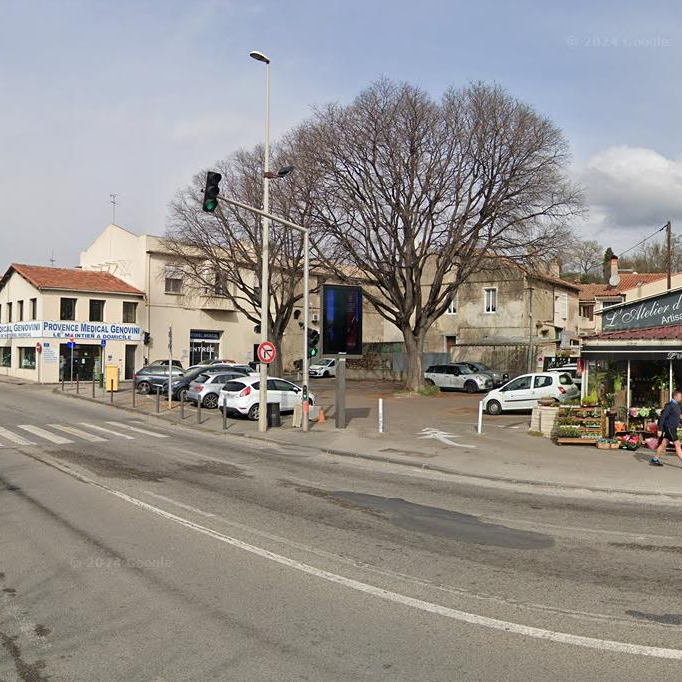

In [ ]:
image = Image.open("/content/data_marseille/dooh_2_pano_3.jpg")
boxes = dino(image,'Outdoor Digital Screens')
img = decoupe_quart(image, boxes)
img

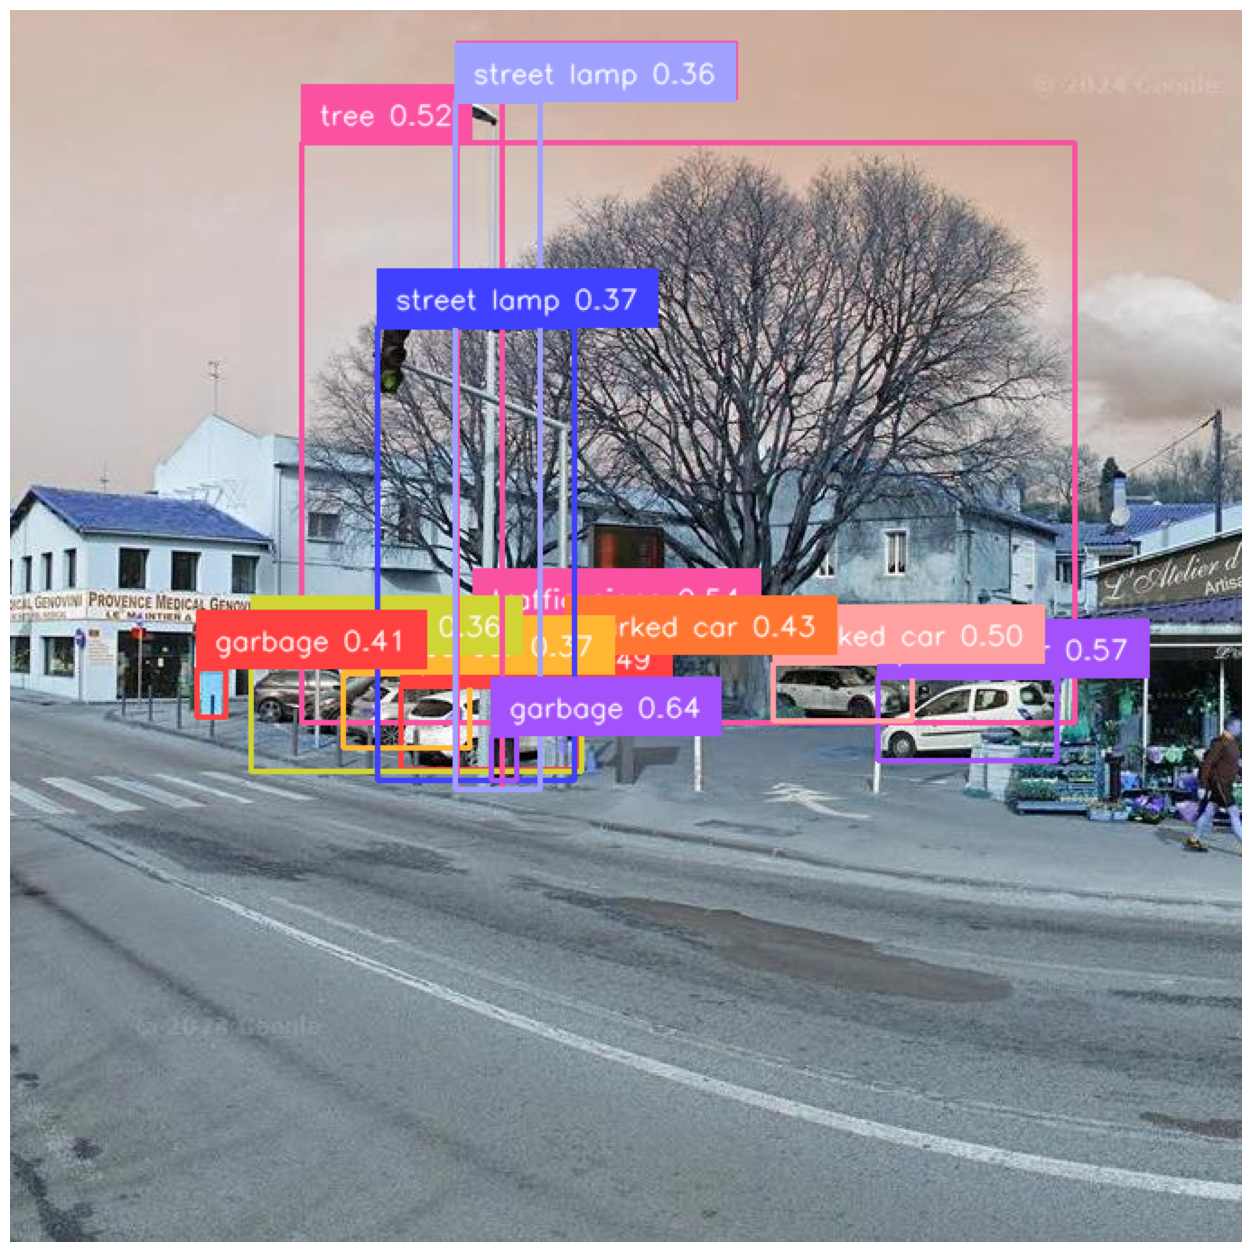

In [ ]:
def dinono (image, prompt):
  boxes = []
  BOX_TRESHOLD = 0.35
  TEXT_TRESHOLD = 0.25
  image.save("/content/data/saved_image.jpg")
  image_source, image_1 = load_image(r'/content/data/saved_image.jpg')
  for p in prompt:
    boxe, logits, phrases = predict(
      model=model,
      image=image_1,
      caption=p,
      box_threshold=BOX_TRESHOLD,
      text_threshold=TEXT_TRESHOLD
    )
    image_source = annotate(image_source=image_source, boxes=boxe, logits=logits, phrases=phrases)
  sv.plot_image(image_source, (16, 16))

obstacle_labels = ["tree", "barriers", "traffic signs", "parked car", "street lamp","garbage can"]
dinono(img,obstacle_labels)

In [ ]:
score_panorama(image,obstacle_labels)

{'tree': 9,
 'barriers': 1,
 'traffic signs': 3,
 'parked car': 3,
 'street lamp': 3}

In [ ]:
obstacle_labels = ["obstacle near Outdoor Digital Screens"] #["tree near Outdoor Digital Screens"]
score_panorama(image,obstacle_labels)

{'obstacle near Outdoor Digital Screens': 3}

## Notation automatique de la base de donnée

In [ ]:
obstacle_labels = ["tree",
                   "barriers",
                   "traffic signs",
                   "parked car",
                   "street lamp"]

from tqdm import tqdm
import pandas as pd
from PIL import Image

for label in obstacle_labels:
    df[label] = 0

for i in tqdm(range(len(df))):
    detection_sums = {label: 0 for label in obstacle_labels}
    count_valid_images = 0
    for k in range(5):
          image = Image.open(f"/content/data_marseille/dooh_{i}_pano_{k}.jpg")
          detection_counts = score_panorama(image, obstacle_labels) #on prend le score de chaque image
          if detection_counts is not None:
              for label, count in detection_counts.items():
                  detection_sums[label] += count
              count_valid_images += 1
    if count_valid_images > 0: #si on a trouvé des images valide on fait la moyenne des objets trouvés
        for label in obstacle_labels:
            df.loc[i, label] = detection_sums[label] / count_valid_images

df[obstacle_labels] = df[obstacle_labels].round(1)
df['score final'] = df[obstacle_labels].sum(axis=1) #pour le score final on fait la somme des objets détectés autour
df = df.sort_values(by='score final', ascending=False)
df.loc[df[obstacle_labels].sum(axis=1) == 0, 'score final'] = 'non trouvé'

df


100%|██████████| 20/20 [02:12<00:00,  6.64s/it]


latitude longitude                                        address  tree  \
4   43,32898   5,43061                     Ave Jean Paul Sartre 13213   5.0   
2   43,28868   5,49929         Ave Louis Regis Dir La Valentine 13211   1.0   
8   43,27226   5,39067                          316 Bd Du Prado 13208   4.0   
5    43,3011   5,39876                                            NaN   1.6   
3    43,2885   5,38187                   3 Rue Dragon 13006 Marseille   0.6   
19   43,3519   5,43675   44 AVENUE DE CHATEAU GOMBERT 13013 MARSEILLE   1.5   
6    43,2473   5,37418   45 Avenue De La Pointe Rouge 13008 Marseille   1.2   
7   43,30566   5,36537  Dev N° 6 Quai Lazaret Terrasses Du Port 13202   2.0   
9   43,27272   5,39037           1 Bd Edouard Herriot 13008 Marseille   2.0   
17  43,30116   5,39867                                            NaN   1.0   
14  43,27178   5,38653             4 BLD EMILE SICARD 13008 MARSEILLE   2.8   
15  43,29628   5,38124                                            NaN   0.0   
13  43,33507   5,45057                   29 GRAND RUE 13013 MARSEILLE   1.8   
11  43,29148    5,3805               Crf City - 2 Place De Rome 13206   0.0   
16  43,29062   5,37576        Crf City - Dvt Nâ°43 Rue Breteuil 13206   0.2   
18  43,29462   5,37643           Dev Nâ° 47 Rue Vacon / Paradis 13201   1.0   
0   43,29807   5,37094                     2 RUE MERY 13002 MARSEILLE   0.0   
1    43,3034   5,39492                 3 Bd Phillipon 13004 Marseille   0.0   
10  43,29665     5,375   Crf Market - Dev Nâ° 28 Rue Bir Hakeim 13201   0.0   
12  43,25256   5,38529          40 AVENUE DE HAMBOURG 13008 MARSEILLE   0.0   

    barriers  traffic signs  parked car  street lamp score final  
4        1.2            2.2         3.4          3.0        14.8  
2        0.0            1.0         7.0          3.0        12.0  
8        1.0            3.5         1.0          2.0        11.5  
5        1.6            2.6         2.2          1.0         9.0  
3        2.0            3.2         3.0          0.0         8.8  
19       1.8            2.0         2.5          1.0         8.8  
6        2.0            0.5         3.2          1.2         8.1  
7        1.0            2.0         2.0          1.0         8.0  
9        2.0            0.0         3.0          1.0         8.0  
17       1.0            2.0         1.7          0.7         6.4  
14       0.6            1.8         0.6          0.6         6.4  
15       1.0            3.0         1.0          1.0         6.0  
13       0.6            1.4         1.0          0.6         5.4  
11       2.0            0.0         1.0          1.0         4.0  
16       1.4            1.2         0.4          0.4         3.6  
18       0.0            1.0         1.0          0.0         3.0  
0        0.0            0.0         0.0          0.0  non trouvé  
1        0.0            0.0         0.0          0.0  non trouvé  
10       0.0            0.0         0.0          0.0  non trouvé  
12       0.0            0.0         0.0          0.0  non trouvé

In [ ]:
!pip install depth_anything_v2.dpt

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.